In [1]:
!pip install yfinance==0.1.67
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
#!pip install plotly==5.3.1


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.22.1) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ╸━━━━━━━━━━━━━━━╸━━━━━━━━   0.0 B /  ??.?MB @

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

 ## Question 1 ##

In [4]:
tesla = yf.Ticker("TSLA")

In [5]:
tesla_info = tesla.info

In [9]:
tesla_data = tesla.history(period="max")
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...
2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0
2022-05-20,713.989990,721.580017,633.000000,663.900024,48190600,0,0.0


In [11]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


## Question 2 ##

In [12]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

In [37]:
t_soup = BeautifulSoup(html_data, 'html5lib')

In [40]:
t_tables = t_soup.find_all('table')

for index,table in enumerate(t_tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        t_table_index = index

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in t_tables[t_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col !=[]):
        date = col[0].text
        revenue = col[1].text
        tesla_revenue = tesla_revenue.append({"Date" : date, "Revenue" : revenue}, ignore_index=True)
tesla_revenue.head()

,Date,Revenue
0,2022-03-31,"$18,756"
1,2021-12-31,"$17,719"
2,2021-09-30,"$13,757"
3,2021-06-30,"$11,958"
4,2021-03-31,"$10,389"


In [43]:
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$',"")
tesla_revenue.head()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



,Date,Revenue
0,2022-03-31,18756
1,2021-12-31,17719
2,2021-09-30,13757
3,2021-06-30,11958
4,2021-03-31,10389


In [42]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.head()

,Date,Revenue
0,2022-03-31,18756
1,2021-12-31,17719
2,2021-09-30,13757
3,2021-06-30,11958
4,2021-03-31,10389


## Question 3 ##

In [21]:
gamestop = yf.Ticker("GME")

In [22]:
gamestop_info = gamestop.info

In [55]:
gme_data = gamestop.history(period = "max")
gme_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,6.480515,6.773401,6.413184,6.766667,19054000,0.0,0.0
2002-02-14,6.850828,6.864294,6.682503,6.733001,2755400,0.0,0.0
2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
2002-02-19,6.665670,6.665670,6.312188,6.430016,1852600,0.0,0.0
2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0
...,...,...,...,...,...,...,...
2022-05-18,96.379997,99.839996,90.169998,91.480003,2890000,0.0,0.0
2022-05-19,91.220001,101.980003,90.160004,99.190002,3180100,0.0,0.0
2022-05-20,99.809998,102.410004,89.750000,95.660004,2488100,0.0,0.0


In [56]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480515,6.773401,6.413184,6.766667,19054000,0.0,0.0
1,2002-02-14,6.850828,6.864294,6.682503,6.733001,2755400,0.0,0.0
2,2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
3,2002-02-19,6.665670,6.665670,6.312188,6.430016,1852600,0.0,0.0
4,2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


## Question 4 ##

In [57]:
gme_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(gme_url).text

In [58]:
soup = BeautifulSoup(html_data, "html5lib")

In [59]:
gme_tables = soup.find_all('table')

for index,table in enumerate(gme_tables):
    if ("GameStop Quarterly Revenue" in str(table)):
        gme_table_index = index
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in gme_tables[gme_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col !=[]):
        date = col[0].text
        revenue = col[1].text
        gme_revenue = gme_revenue.append({"Date" : date, "Revenue" : revenue}, ignore_index=True)
gme_revenue.head()

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


In [51]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


 ## Question 5 ##

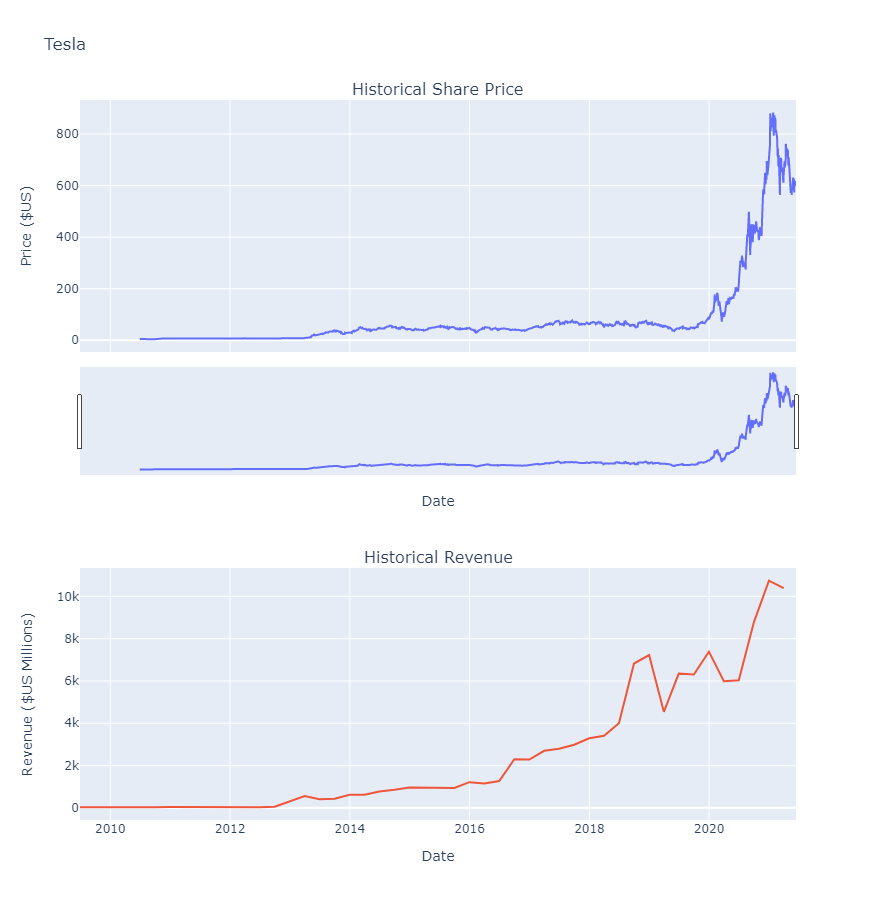

In [61]:
make_graph(tesla_data, tesla_revenue, 'Tesla')